In [1]:
from pathlib import Path
from nilearn.plotting import plot_surf, view_surf, show
from nilearn import datasets
import numpy as np
import matplotlib.pyplot as plt

output_path = Path("/data/parietal/store/data/HCP900/glm/fsaverage5/")

In [2]:
# Fetch the fsaverage5 surface
fsaverage5 = datasets.fetch_surf_fsaverage(mesh="fsaverage5")

In [3]:
# plot data
import matplotlib.pyplot as plt
from nibabel import load
sub = '996782'
interest = {
    'LANGUAGE': ['MATH-STORY'],
    'WM': ['2BK-0BK', 'BODY-AVG', 'PLACE-AVG', 'TOOL-AVG', 'FACE-AVG'],
    'EMOTION': ['SHAPES-FACES'],
    'SOCIAL': ['TOM-RANDOM'],
    'RELATIONAL': ['REL-MATCH'],
    'GAMBLING': ['PUNISH-REWARD'],
    'MOTOR': ['RH-AVG', 'RF-AVG', 'T-AVG', 'LH-AVG', 'LF-AVG']
}
hemi = 'left'
for task in list(interest.keys())[:1]:
    for contrast in interest[task]:
        img =  output_path / sub / task / "level2" / "z_maps" / f"z_{contrast}_{hemi[0]}h.gii"
        data = load(img).agg_data()
        view = view_surf(
            fsaverage5[f'pial_{hemi}'],  
            data,
            fsaverage5[f'sulc_{hemi}'],
            # hemi=hemi,
            # view='lateral',
            # engine='matplotlib',
            threshold=2.3,
            title=contrast
        )
view

In [6]:
barycenter_path = Path("barycenters_vis")

TH = 0.2
def normalize(contrast):
    return contrast / np.max(np.abs(contrast))

Text(0.5, 0.98, 'Euclidean barycenters')

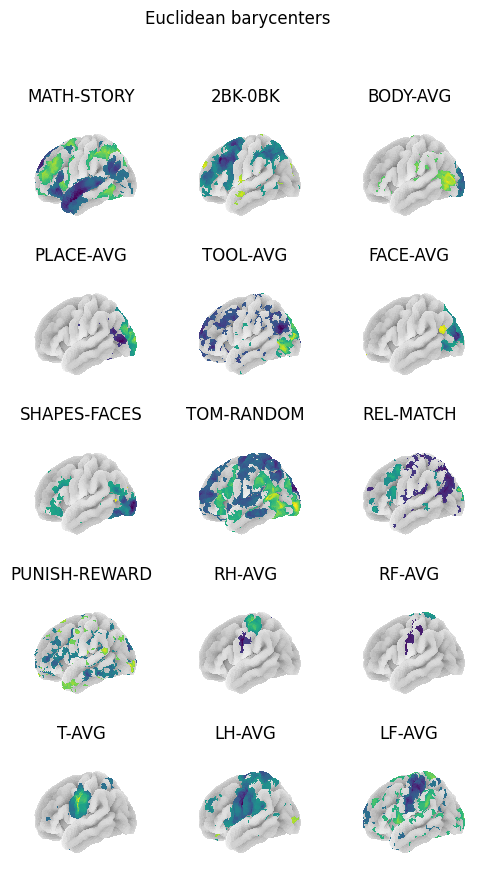

In [7]:
barycenter_path_euc = barycenter_path / "euclidean"

fig = plt.figure(figsize=(6, 10))
q = 0
template = {}
for task in list(interest.keys()):
    for contrast in interest[task]:
        data = load(barycenter_path_euc / task / "level2" / "z_maps" / f"z_{contrast}_{hemi[0]}h.gii").agg_data()
        template[contrast] = data
        q += 1
        ax = fig.add_subplot(5, 3, q, projection='3d')
        plot_surf(
            fsaverage5[f'pial_{hemi}'],
            normalize(data),
            fsaverage5[f'sulc_{hemi}'],
            hemi=hemi,
            view='lateral',
            engine='matplotlib',
            threshold=TH,
            axes=ax
        )
        ax.set_title(contrast)
plt.suptitle("Euclidean barycenters")

Text(0.5, 0.98, 'FUGW barycenters')

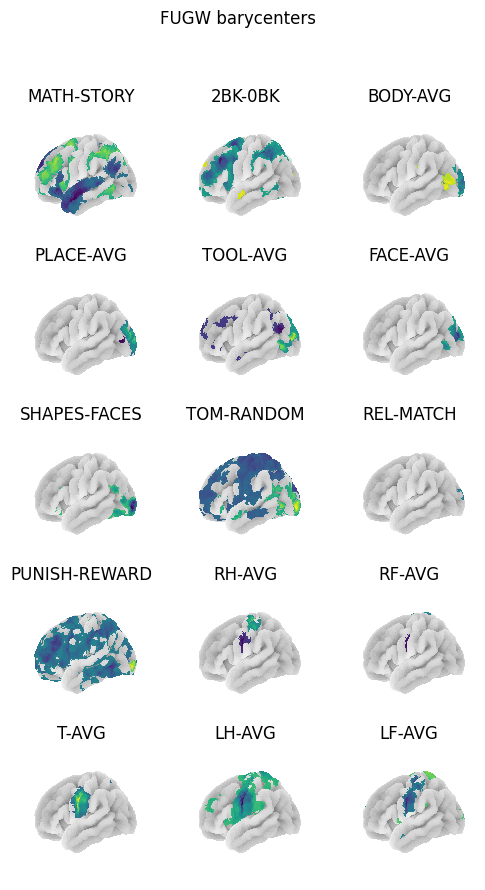

In [8]:
barycenter_path_fugw = barycenter_path / "alpha_0.5_rho_1_eps_0.0001"

fig = plt.figure(figsize=(6, 10))
q = 0
template_fugw = {}
for task in list(interest.keys()):
    for contrast in interest[task]:
        data = load(barycenter_path_fugw / task / "level2" / "z_maps" / f"z_{contrast}_{hemi[0]}h.gii").agg_data()
        q += 1
        template_fugw[contrast] = data
        ax = fig.add_subplot(5, 3, q, projection='3d')
        plot_surf(
            fsaverage5[f'pial_{hemi}'],
            normalize(data),
            fsaverage5[f'sulc_{hemi}'],
            hemi=hemi,
            view='lateral',
            engine='matplotlib',
            threshold=TH,
            axes=ax
        )
        ax.set_title(contrast)
plt.suptitle("FUGW barycenters")

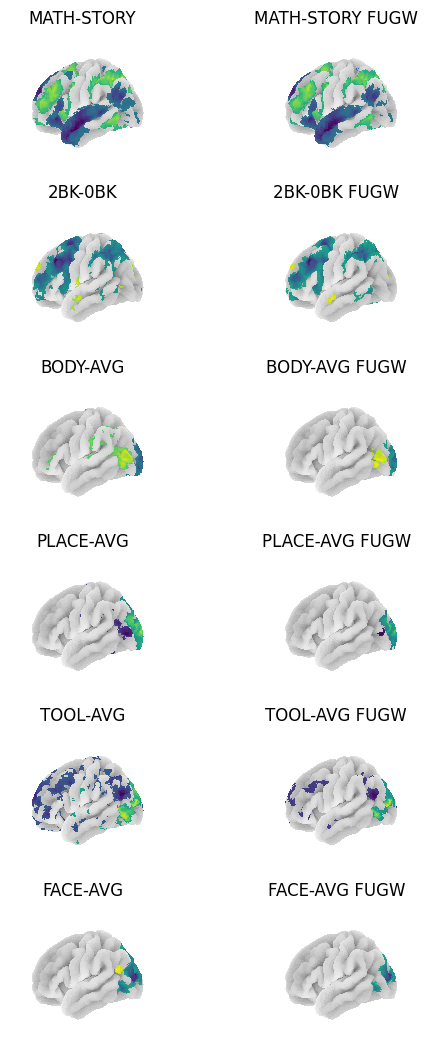

In [9]:
# compare two by two
fig = plt.figure(figsize=(6, 20))
q = 1
for task in list(interest.keys())[:2]:
    for contrast in interest[task]:
        ax = fig.add_subplot(9, 2, q, projection='3d')
        plot_surf(
            fsaverage5[f'pial_{hemi}'],
            normalize(template[contrast]),
            fsaverage5[f'sulc_{hemi}'],
            hemi=hemi,
            view='lateral',
            engine='matplotlib',
            threshold=TH,
            axes=ax
        )
        ax.set_title(contrast)

        ax = fig.add_subplot(9, 2, q + 1, projection='3d')
        plot_surf(
            fsaverage5[f'pial_{hemi}'],
            normalize(template_fugw[contrast]),
            fsaverage5[f'sulc_{hemi}'],
            hemi=hemi,
            view='lateral',
            engine='matplotlib',
            threshold=TH,
            axes=ax
        )
        ax.set_title(contrast + ' FUGW')
        q += 2